In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [239]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection,  tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

from sklearn.model_selection import GridSearchCV


In [ ]:

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

train
# survived : 0 = No, 1 = Yes | embarked :C = Cherbourg, Q = Queenstown, S = Southampton

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test
#1 coluna a menos porque se ocultou o alvo de previsao
#test.info
#test.isnull().sum()
#test.describe()
#Note: a menor fare(tarifa) foi de 0, entenda why/who didnt pay for a ticket. Isso tanto no test como no train dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [246]:

passengerId = test['PassengerId']
#instead of preprocessing the data in a separated way (train and test), preferi juntar os 2 dataframes e tratar tudo junto e depois separar
#print(type(train)) pra confirmar se e dataframe (o mesmo com test). estava dar erro de concatenacao
#solucao do erro AttributeError: 'DataFrame' object has no attribute 'append' : apartir de pandas 2.0.0 ja nao funciona append..agora usa-se concat

titanic_df = pd.concat([train, test], ignore_index=True)



KeyError: 'PassengerId'

In [ ]:
train_index=len(train)
test_index=len(titanic_df)-len(test)

In [ ]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
titanic_df.info

<bound method DataFrame.info of       PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                

In [98]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [99]:
df=pd.DataFrame()

## SURVIVED





In [100]:
titanic_df['Survived'].nunique() #nr de valores unicos


2

In [101]:
titanic_df['Survived'].unique() #ver os valores unicos

array([ 0.,  1., nan])

In [102]:
titanic_df['Survived'].isnull().sum()

418

In [103]:
titanic_df['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

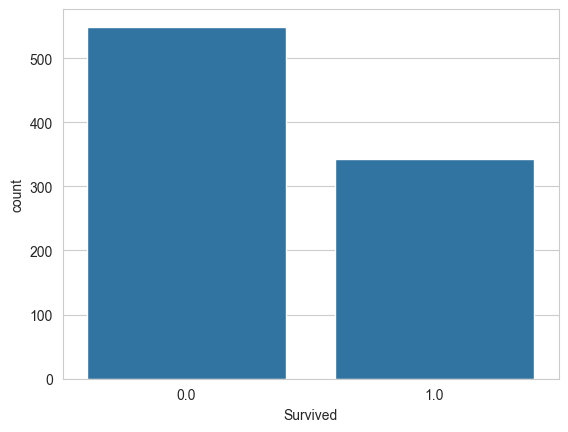

In [104]:
sns.countplot(data = titanic_df, x='Survived')

Quantidade de valores unicos:   2

Quais sao os valores unicos:  [ 0.  1. nan]

Quantidade de valores nulos: 418

Quantidade por opcao:         Survived
0.0    549
1.0    342
Name: count, dtype: int64


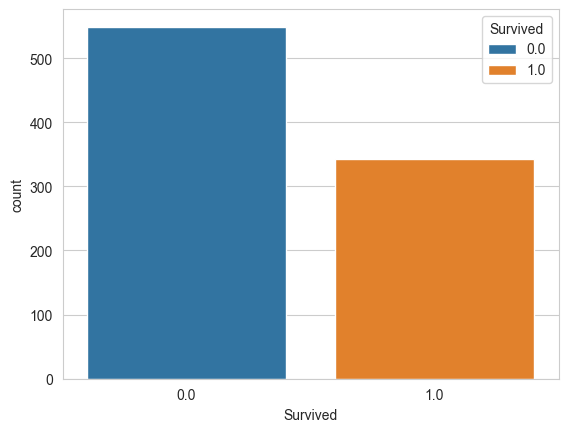

In [105]:
def titanic_func(data, column, count = True):
    print(f'Quantidade de valores unicos:   {data[column].nunique()}')
    print(f'\nQuais sao os valores unicos:  {data[column].unique()}')
    print(f'\nQuantidade de valores nulos: {data[column].isnull().sum()}')
    print(f'\nQuantidade por opcao:         {data[column].value_counts()}')

    if count == True:
        sns.countplot(data = data, x = column, hue='Survived')
    else:
        sns.displot(data[column],kde = True)

titanic_func(titanic_df, 'Survived')

In [106]:
df['Survived'] = titanic_df['Survived']
df

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
1304,NaN
1305,NaN
1306,NaN
1307,NaN


# PClass


Quantidade de valores unicos:   3

Quais sao os valores unicos:  [3 1 2]

Quantidade de valores nulos: 0

Quantidade por opcao:         Pclass
3    709
1    323
2    277
Name: count, dtype: int64


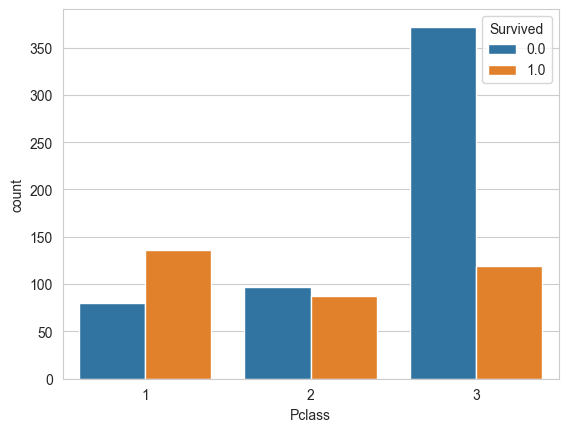

In [107]:
titanic_func(titanic_df, 'Pclass')

In [108]:
df['Pclass']=titanic_df['Pclass']
df

,Survived,Pclass
0,0.0,3
1,1.0,1
2,1.0,3
3,1.0,1
4,0.0,3
...,...,...
1304,NaN,3
1305,NaN,1
1306,NaN,3
1307,NaN,3


# SEX

In [109]:
#vamos substituir male-0 e female-1, pra nao trabalhar com strings
titanic_df['Sex']=titanic_df['Sex'].replace(['male','female'],[0,1])

C:\Users\ext2045875\AppData\Local\Temp\ipykernel_16044\2752519860.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_df['Sex']=titanic_df['Sex'].replace(['male','female'],[0,1])


Quantidade de valores unicos:   2

Quais sao os valores unicos:  [0 1]

Quantidade de valores nulos: 0

Quantidade por opcao:         Sex
0    843
1    466
Name: count, dtype: int64


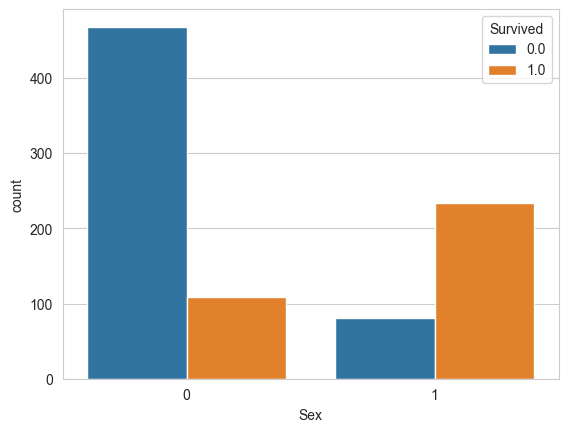

In [110]:
titanic_func(titanic_df,'Sex')
#ao observarmos titanic_df.head(2) conseguimos ver que ja nao vem escrito male/female na coluna sex e sim 0/1

In [111]:
df['Sex'] = titanic_df['Sex']
df

,Survived,Pclass,Sex
0,0.0,3,0
1,1.0,1,1
2,1.0,3,1
3,1.0,1,1
4,0.0,3,0
...,...,...,...
1304,NaN,3,0
1305,NaN,1,1
1306,NaN,3,0
1307,NaN,3,0


# AGE

Quantidade de valores unicos:   98

Quais sao os valores unicos:  [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]

Quantidade de valores nulos: 263

Quantidade por opcao:         Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: count, Length: 98, dtype: int64


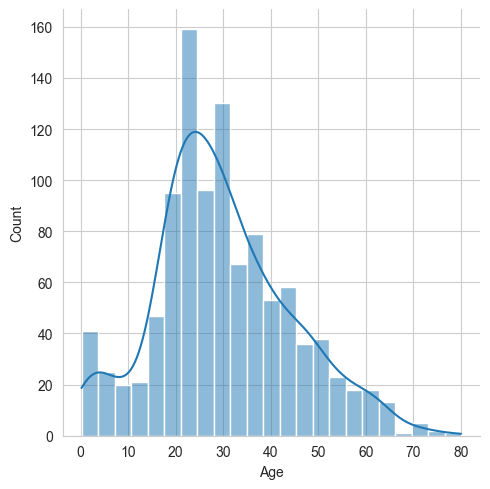

In [112]:
titanic_func(titanic_df, 'Age', False)

### deal with missing values

In [113]:
#existem 3 abordagens: apagar as linhas com algum valor em falta, imputacao (com a media entre os valores), extensao de imputacao

titanic_df['Age'].mean()
# Nao e aconselhavel fazer imputacao para muitos NaN como nesse caso (263 valores)

29.881137667304014

In [114]:
#titanic_df.corr()

# Excluir colunas não numéricas
numeric_columns = titanic_df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = titanic_df[numeric_columns]

# Calcular correlação
numeric_df.corr()

#matrix de correlacao,
# 1 indica uma correlação positiva perfeita: quando uma variável aumenta, a outra também aumenta na mesma proporção.
#-1 indica uma correlação negativa perfeita: quando uma variável aumenta, a outra diminui na mesma proporção.
# Valores próximos de 0 indicam pouca ou nenhuma correlação: as variáveis não têm relação linear.
#uma vez que sec-pclass deu -0.408106, significa que sao variaveis com alguma linearidade

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,-0.013406,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.124617,-0.408106,0.060832,0.018322,-0.558629
Sex,-0.013406,0.543351,-0.124617,1.000000,-0.063645,0.109609,0.213125,0.185523
Age,0.028814,-0.077221,-0.408106,-0.063645,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,0.109609,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,0.213125,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.185523,0.178740,0.160238,0.221539,1.000000


In [115]:
titanic_df[titanic_df['Pclass'] == 1 ] # mostra somente linhas com pclass 1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
11,12,1.0,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S
23,24,1.0,1,"Sloper, Mr. William Thompson",0,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1295,NaN,1,"Carrau, Mr. Jose Pedro",0,17.0,0,0,113059,47.1000,NaN,S
1295,1296,NaN,1,"Frauenthal, Mr. Isaac Gerald",0,43.0,1,0,17765,27.7208,D40,C
1298,1299,NaN,1,"Widener, Mr. George Dunton",0,50.0,1,1,113503,211.5000,C80,C
1302,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",1,37.0,1,0,19928,90.0000,C78,Q


In [116]:
#titanic_df[titanic_df['Pclass'] == 1 ]['Age'].mean()
#titanic_df[titanic_df['Pclass'] == 2 ]['Age'].mean()
#titanic_df[titanic_df['Pclass'] == 3 ]['Age'].mean()
# ao inves de eu colocar as 3 linhas acima, posso criar um for pra isso

for i in titanic_df['Pclass'].unique():
    print(f'Pessoas da {i}ª classe tem a media de idade de: {titanic_df[titanic_df['Pclass'] == i ]['Age'].mean()}')

Pessoas da 3ª classe tem a media de idade de: 24.81636726546906
Pessoas da 1ª classe tem a media de idade de: 39.15992957746479
Pessoas da 2ª classe tem a media de idade de: 29.506704980842912


In [117]:
#titanic_df.head()

In [118]:
#Entao, para lidarmos com missing values nesse caso podemos fazer o seguinte:
#imputacao da media (coluna AGE) de acordo com matrix de correlacao. 
#quando na linha tem missing value Age, se na col pclass tem classe 1 a media na idade sera X, se tem classe 2 a media na idade sera Y, assim em diante
titanic_df['Age'].isnull().sum()

263

In [119]:
#nb: depois compara usando imputacao com extensao, e considera nome tambem (primeira palavra "mrs,master,etc") porque tem influencia
count=0
for i in titanic_df.index:
    if pd.isnull(titanic_df['Age'][i]):
        if titanic_df['Pclass'][i] == 1:
            titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 1]['Age'].mean())
        elif titanic_df['Pclass'][i] == 2:
            titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 2]['Age'].mean())
        elif titanic_df['Pclass'][i] == 3:
            titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean())
    else:
        continue

C:\Users\ext2045875\AppData\Local\Temp\ipykernel_16044\4087336844.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean())
C:\Users\ext2045875\AppData\Local\Temp\i

C:\Users\ext2045875\AppData\Local\Temp\ipykernel_16044\4087336844.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 2]['Age'].mean())
C:\Users\ext2045875\AppData\Local\Temp\ip

In [120]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",0,25.0,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [121]:
titanic_df[titanic_df['Pclass']==1]['Age'].isnull().sum()
titanic_df.isnull().sum()
#como observado agora, ja nao tem as 256 linhas com Age null

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [122]:
df['Age']=titanic_df['Age']
df

,Survived,Pclass,Sex,Age
0,0.0,3,0,22.0
1,1.0,1,1,38.0
2,1.0,3,1,26.0
3,1.0,1,1,35.0
4,0.0,3,0,35.0
...,...,...,...,...
1304,NaN,3,0,25.0
1305,NaN,1,1,39.0
1306,NaN,3,0,38.5
1307,NaN,3,0,25.0


## SibSp

Quantidade de valores unicos:   7

Quais sao os valores unicos:  [1 0 3 4 2 5 8]

Quantidade de valores nulos: 0

Quantidade por opcao:         SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64


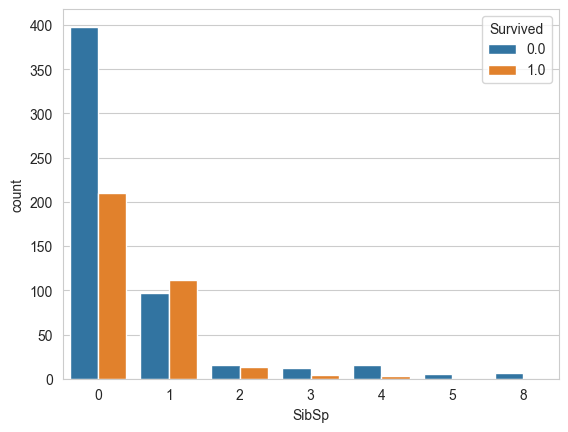

In [123]:
titanic_func(titanic_df, 'SibSp')

In [124]:
df['SibSp']=titanic_df['SibSp']
df

,Survived,Pclass,Sex,Age,SibSp
0,0.0,3,0,22.0,1
1,1.0,1,1,38.0,1
2,1.0,3,1,26.0,0
3,1.0,1,1,35.0,1
4,0.0,3,0,35.0,0
...,...,...,...,...,...
1304,NaN,3,0,25.0,0
1305,NaN,1,1,39.0,0
1306,NaN,3,0,38.5,0
1307,NaN,3,0,25.0,0


In [125]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,25.0,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",0,25.0,0,0,359309,8.0500,NaN,S


## Parch

Quantidade de valores unicos:   8

Quais sao os valores unicos:  [0 1 2 5 3 4 6 9]

Quantidade de valores nulos: 0

Quantidade por opcao:         Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64


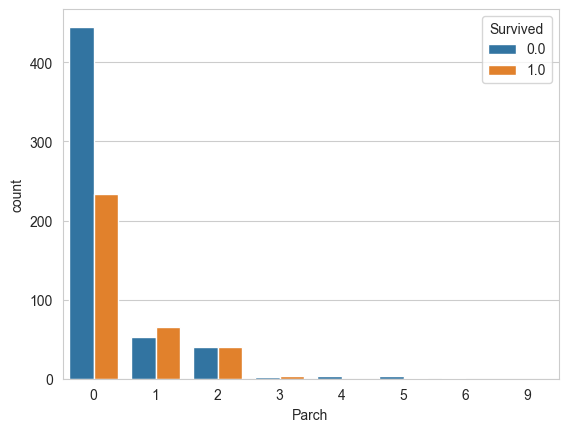

In [126]:
titanic_func(titanic_df, 'Parch')


In [127]:
df['Parch']=titanic_df['Parch']
df

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0.0,3,0,22.0,1,0
1,1.0,1,1,38.0,1,0
2,1.0,3,1,26.0,0,0
3,1.0,1,1,35.0,1,0
4,0.0,3,0,35.0,0,0
...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,0
1305,NaN,1,1,39.0,0,0
1306,NaN,3,0,38.5,0,0
1307,NaN,3,0,25.0,0,0


##### ideia : adicionar nova feature :tamanho da familia. se a pessoa vai sozinha entao familysize=1 ; se vai com 1 SibSp ou ParCh aumenta too ;  nb: SibSp - sibling/spouse | ParCh - Parent/Child
# Family Size

In [128]:
titanic_df['FamilySize'] = titanic_df['SibSp']+titanic_df['Parch'] + 1
#Coloco +1 porque o minimo e sempre 1. se a pessoa viaja sozinha entao tamanho da familia dela e 1

In [129]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


In [130]:
df['FamilySize']=titanic_df['FamilySize']
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize
0,0.0,3,0,22.0,1,0,2
1,1.0,1,1,38.0,1,0,2
2,1.0,3,1,26.0,0,0,1
3,1.0,1,1,35.0,1,0,2
4,0.0,3,0,35.0,0,0,1
...,...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,0,1
1305,NaN,1,1,39.0,0,0,1
1306,NaN,3,0,38.5,0,0,1
1307,NaN,3,0,25.0,0,0,1


# Fare

Quantidade de valores unicos:   281

Quais sao os valores unicos:  [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.    

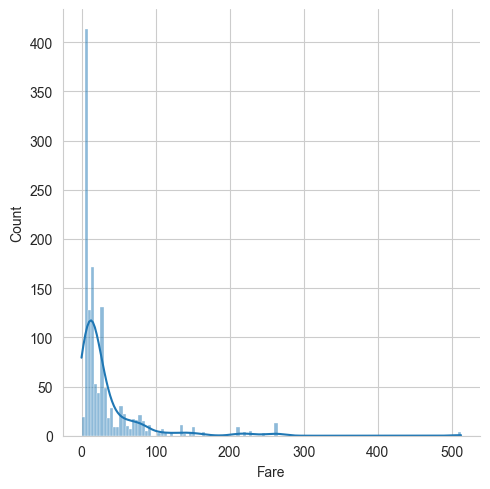

In [131]:
titanic_func(titanic_df,'Fare', False)

In [132]:
#fare-preco de passagem. Investiga quem foi essa unica pessoa que nao pagou pela passagem
titanic_df[titanic_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
1043,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,1


In [133]:

numeric_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,-0.013406,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.124617,-0.408106,0.060832,0.018322,-0.558629
Sex,-0.013406,0.543351,-0.124617,1.000000,-0.063645,0.109609,0.213125,0.185523
Age,0.028814,-0.077221,-0.408106,-0.063645,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,0.109609,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,0.213125,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.185523,0.178740,0.160238,0.221539,1.000000


In [134]:
#apartir da matrix acima e possivel ver que Fare tem alguma relacao com Pclass o que faz muito sentido. 

#faz o mesmo exercicio feito com media e feature relacionado que fiz no AGE

titanic_df[titanic_df['Pclass'] == 3]['Fare'].mean() #quero ver qual e a media do Fare nos casos em que a Pclass era 3


13.302888700564973

In [135]:
titanic_df['Fare'].fillna(titanic_df[titanic_df['Pclass'] == 3]['Fare'].mean(), inplace = True) 

C:\Users\ext2045875\AppData\Local\Temp\ipykernel_16044\1988031064.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Fare'].fillna(titanic_df[titanic_df['Pclass'] == 3]['Fare'].mean(), inplace = True)


In [136]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
FamilySize        0
dtype: int64

In [137]:
df['Fare']=titanic_df['Fare']


# Cabin

In [138]:
titanic_df['Cabin'].isnull().sum()

1014

Quantidade de valores unicos:   186

Quais sao os valores unicos:  [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A2

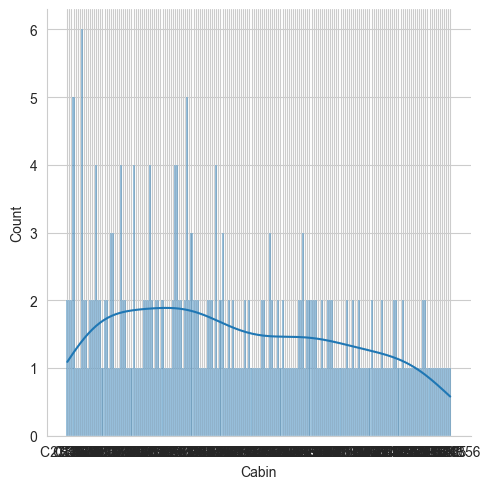

In [139]:
titanic_func(titanic_df,'Cabin', False)

In [140]:
#descarta Cabine, nao usa no df. Parece-me irrelevante

# Embarked

Quantidade de valores unicos:   3

Quais sao os valores unicos:  ['S' 'C' 'Q' nan]

Quantidade de valores nulos: 2

Quantidade por opcao:         Embarked
S    914
C    270
Q    123
Name: count, dtype: int64


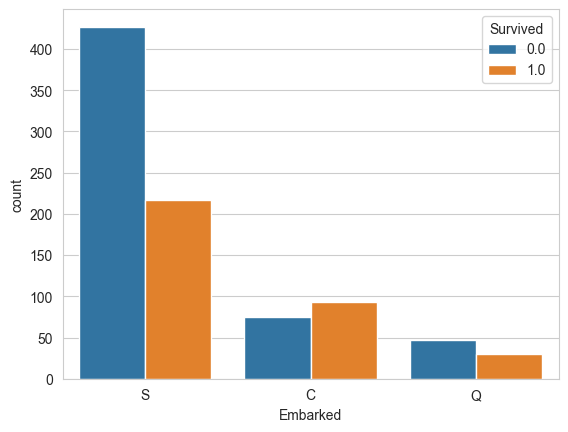

In [141]:
titanic_func(titanic_df, 'Embarked')

In [142]:
#titanic_df[titanic_df['Embarked'].isnull()]
titanic_df[titanic_df['Embarked'] == 'S']['Survived'].mean()

titanic_df[titanic_df['Embarked'] == 'S']['Pclass'].mean()

2.3479212253829322

In [143]:
#Embarked se refere a Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

#titanic_df.head(10)
titanic_df[titanic_df]['Embarked'].isnull()]


SyntaxError: unmatched ']' (880736557.py, line 4)

In [ ]:
titanic_df['Embarked'].fillna("C", inplace=True) #posso fazer o fillna assim porque eu tenho a certeza de quais foram os unicos casos do NaN

In [ ]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
FamilySize        0
dtype: int64

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare
0,0.0,3,0,22.0,1,0,2,7.2500
1,1.0,1,1,38.0,1,0,2,71.2833
2,1.0,3,1,26.0,0,0,1,7.9250
3,1.0,1,1,35.0,1,0,2,53.1000
4,0.0,3,0,35.0,0,0,1,8.0500
...,...,...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,0,1,8.0500
1305,NaN,1,1,39.0,0,0,1,108.9000
1306,NaN,3,0,38.5,0,0,1,7.2500
1307,NaN,3,0,25.0,0,0,1,8.0500


In [158]:
df['Embarked']= titanic_df['Embarked']

In [159]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked
0,0.0,3,0,22.0,1,0,2,7.2500,S
1,1.0,1,1,38.0,1,0,2,71.2833,C
2,1.0,3,1,26.0,0,0,1,7.9250,S
3,1.0,1,1,35.0,1,0,2,53.1000,S
4,0.0,3,0,35.0,0,0,1,8.0500,S
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,0,1,8.0500,S
1305,NaN,1,1,39.0,0,0,1,108.9000,C
1306,NaN,3,0,38.5,0,0,1,7.2500,S
1307,NaN,3,0,25.0,0,0,1,8.0500,S


# NAME

In [160]:
#ideia: cria uma feature called titulo  : separa titulo do nome
titanic_df['Name']
#padrao: Apelido , Mr (titulo). Nome. Vamos extrair titulo

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [161]:
#titanic_df['Title']=titanic_df["Name"].apply(lambda name: name, split(','[1].split('.')[0]))
#list Comprehension
#[titanic_df['Name'].split(',') for n in titanic_df.index]
#[titanic_df['Name'][n].split(',') for n in titanic_df.index] #onde tem a ',' ele separa em 2
#[titanic_df['Name'][n].split(',')[1] for n in titanic_df.index] #aparce so o que esta depois da virgula
#[titanic_df['Name'][n].split(',')[1].split('.') for n in titanic_df.index] #separa apartir do ponto. so fica 'mr' , 'owen harris' por exemplo
#[titanic_df['Name'][n].split(',')[1].split('.')[0] for n in titanic_df.index] #ja me da so o 'mr' o problema e que comeca com um espaco ' mr', temos que eliminar essa blank space

titanic_df['Title']=[titanic_df['Name'][n].split(',')[1].split('.')[0].strip() for n in titanic_df.index] 

In [162]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,25.0,0,0,A.5. 3236,8.0500,NaN,S,1,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,1,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",0,25.0,0,0,359309,8.0500,NaN,S,1,Mr


Quantidade de valores unicos:   18

Quais sao os valores unicos:  ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']

Quantidade de valores nulos: 0

Quantidade por opcao:         Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64


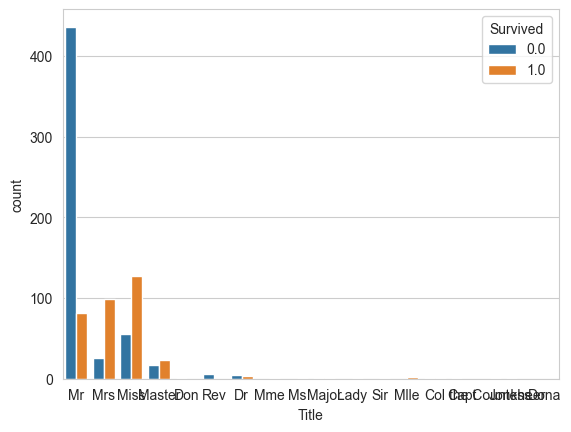

In [163]:
titanic_func(titanic_df, 'Title')

pra minimizar as categorias adoptei uma suposicao. So vou considerar : Mr ,Miss ,Mrs ,Master 
O restatnte: Rev,Dr,Col etc etc vou juntar para uma categoria que e 'person'

In [164]:
titanic_df['Title'] = [n if n in ['Mr','Miss','Mrs','Master'] else 'Person' for n in titanic_df['Title']]
titanic_df.head(31)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,Mr
5,6,0.0,3,"Moran, Mr. James",0,25.0,0,0,330877,8.4583,NaN,Q,1,Mr
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,1,Mr
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,5,Master
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,3,Mrs
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,2,Mrs


Quantidade de valores unicos:   5

Quais sao os valores unicos:  ['Mr' 'Mrs' 'Miss' 'Master' 'Person']

Quantidade de valores nulos: 0

Quantidade por opcao:         Title
Mr        757
Miss      260
Mrs       197
Master     61
Person     34
Name: count, dtype: int64


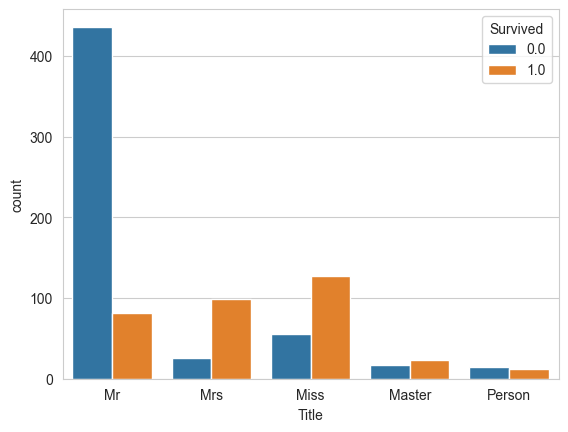

In [165]:
titanic_func(titanic_df, 'Title')
#agora valores unicos sao 5 ao inves de 18

In [168]:
df['Title']=titanic_df['Title']
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked,Title
0,0.0,3,0,22.0,1,0,2,7.2500,S,Mr
1,1.0,1,1,38.0,1,0,2,71.2833,C,Mrs
2,1.0,3,1,26.0,0,0,1,7.9250,S,Miss
3,1.0,1,1,35.0,1,0,2,53.1000,S,Mrs
4,0.0,3,0,35.0,0,0,1,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,0,1,8.0500,S,Mr
1305,NaN,1,1,39.0,0,0,1,108.9000,C,Person
1306,NaN,3,0,38.5,0,0,1,7.2500,S,Mr
1307,NaN,3,0,25.0,0,0,1,8.0500,S,Mr


### One Hot Encoding for Pclass

In [174]:
#pra lidar com dados categoricos posso : drop categorical values, fazer OE-Ordinal Encoding, fazer OHE-One-hot encoding. Lembra-te que OE e pra categorias que seguem uma ordem, e OHE e pra categorias que nao tem nenhuma ordem
# Para Pclass posso usar OHE apartir de get_dummies
pclass = pd.get_dummies(df['Pclass'], prefix='Pclass').astype(int)
pclass

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
1304,0,0,1
1305,1,0,0
1306,0,0,1
1307,0,0,1


### One Hot Encoding para Title

In [176]:
title = pd.get_dummies(df['Title'], prefix='Title').astype(int)
title

,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Person
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
1304,0,0,1,0,0
1305,0,0,0,0,1
1306,0,0,1,0,0
1307,0,0,1,0,0


### One Hot Encoding para Embarked

In [182]:
embarked = pd.get_dummies(df['Embarked'], prefix='Embarked').astype(int)
embarked

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1304,0,0,1
1305,1,0,0
1306,0,0,1
1307,0,0,1


In [184]:
#concatenar ao dataframe as novas features . tambem devemos apagar as colunas originais
titanic_completo=pd.concat([df, pclass, title, embarked], axis=1)

In [185]:
titanic_completo.drop(['Pclass', 'Title', 'Embarked'], axis=1, inplace =  True)

In [187]:
titanic_completo

,Survived,Sex,Age,SibSp,Parch,FamilySize,Fare,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0,22.0,1,0,2,7.2500,0,0,1,0,0,1,0,0,0,0,1
1,1.0,1,38.0,1,0,2,71.2833,1,0,0,0,0,0,1,0,1,0,0
2,1.0,1,26.0,0,0,1,7.9250,0,0,1,0,1,0,0,0,0,0,1
3,1.0,1,35.0,1,0,2,53.1000,1,0,0,0,0,0,1,0,0,0,1
4,0.0,0,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0,25.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,1
1305,NaN,1,39.0,0,0,1,108.9000,1,0,0,0,0,0,0,1,1,0,0
1306,NaN,0,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,1
1307,NaN,0,25.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,1


### Train an Test data split

In [189]:
train = titanic_completo[:train_index].copy()
test = titanic_completo[test_index:].copy()

In [190]:
train
#nb: ML e construido com estes dados de treino

,Survived,Sex,Age,SibSp,Parch,FamilySize,Fare,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0,22.0,1,0,2,7.2500,0,0,1,0,0,1,0,0,0,0,1
1,1.0,1,38.0,1,0,2,71.2833,1,0,0,0,0,0,1,0,1,0,0
2,1.0,1,26.0,0,0,1,7.9250,0,0,1,0,1,0,0,0,0,0,1
3,1.0,1,35.0,1,0,2,53.1000,1,0,0,0,0,0,1,0,0,0,1
4,0.0,0,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0,27.0,0,0,1,13.0000,0,1,0,0,0,0,0,1,0,0,1
887,1.0,1,19.0,0,0,1,30.0000,1,0,0,0,1,0,0,0,0,0,1
888,0.0,1,25.0,1,2,4,23.4500,0,0,1,0,1,0,0,0,0,0,1
889,1.0,0,26.0,0,0,1,30.0000,1,0,0,0,0,1,0,0,1,0,0


In [194]:
train['Survived']=train['Survived'].astype(int) #para deixar de ser float
train

,Survived,Sex,Age,SibSp,Parch,FamilySize,Fare,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_C,Embarked_Q,Embarked_S
0,0,0,22.0,1,0,2,7.2500,0,0,1,0,0,1,0,0,0,0,1
1,1,1,38.0,1,0,2,71.2833,1,0,0,0,0,0,1,0,1,0,0
2,1,1,26.0,0,0,1,7.9250,0,0,1,0,1,0,0,0,0,0,1
3,1,1,35.0,1,0,2,53.1000,1,0,0,0,0,0,1,0,0,0,1
4,0,0,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,0,0,1,13.0000,0,1,0,0,0,0,0,1,0,0,1
887,1,1,19.0,0,0,1,30.0000,1,0,0,0,1,0,0,0,0,0,1
888,0,1,25.0,1,2,4,23.4500,0,0,1,0,1,0,0,0,0,0,1
889,1,0,26.0,0,0,1,30.0000,1,0,0,0,0,1,0,0,1,0,0


In [204]:
# X e todo dataframe menos survived ; Y e so o Survived (alvo)
X = train.drop('Survived', axis=1)
y = train['Survived']

In [205]:
X

,Sex,Age,SibSp,Parch,FamilySize,Fare,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,2,7.2500,0,0,1,0,0,1,0,0,0,0,1
1,1,38.0,1,0,2,71.2833,1,0,0,0,0,0,1,0,1,0,0
2,1,26.0,0,0,1,7.9250,0,0,1,0,1,0,0,0,0,0,1
3,1,35.0,1,0,2,53.1000,1,0,0,0,0,0,1,0,0,0,1
4,0,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,1,13.0000,0,1,0,0,0,0,0,1,0,0,1
887,1,19.0,0,0,1,30.0000,1,0,0,0,1,0,0,0,0,0,1
888,1,25.0,1,2,4,23.4500,0,0,1,0,1,0,0,0,0,0,1
889,0,26.0,0,0,1,30.0000,1,0,0,0,0,1,0,0,1,0,0


In [210]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int32

In [214]:
X_test = test.drop('Survived', axis=1) #nosso dataframe para teste. apaguei a coluna alvo que so tinha NaN (survived)


---

In [227]:
def func_accuracy(algoritmo, X_train, y_train, validcruz):
    modelo=algoritmo.fit(X_train, y_train)
    accuracia=round(modelo.score(X_train, y_train) * 100,2)

    train_pred=model_selection.cross_val_predict(algoritmo, X_train, y_train, cv=validcruz, n_jobs = -1)
    acuracia_validcruz=round(metrics.accuracy_score(y_train, train_pred) * 100,2)

    return accuracia, acuracia_validcruz

### Random Forest

In [228]:
acc_rf, acc_cv_rf = func_accuracy(RandomForestClassifier(), X, y, 10)
print(f"acuracia: {acc_rf}")
print(f"acuracia cross-validation: {acc_cv_rf}")

acuracia: 98.32
acuracia cross-validation: 80.81


### Logistic Regression

In [230]:
acc_log, acc_cv_log = func_accuracy(LogisticRegression(max_iter=1000), X, y, 10)
print(f"acuracia: {acc_log}")
print(f"acuracia cross-validation: {acc_cv_log}")

acuracia: 83.28
acuracia cross-validation: 83.05


### K-Nearest Neighbours

In [232]:
acc_knn, acc_cv_knn = func_accuracy(KNeighborsClassifier(), X, y, 10)
print(f"acuracia: {acc_knn}")
print(f"acuracia cross-validation: {acc_cv_knn}")

acuracia: 80.92
acuracia cross-validation: 73.06


### Gaussian Naive Bayes

In [234]:
acc_gaus, acc_cv_gaus = func_accuracy(GaussianNB(), X, y, 10)
print(f"acuracia: {acc_gaus}")
print(f"acuracia cross-validation: {acc_cv_gaus}")

acuracia: 80.58
acuracia cross-validation: 80.36


### Linear Support Vector Machines (SVC)

In [235]:
acc_linear_svc, acc_cv_linear_svc = func_accuracy(LinearSVC(dual=False),X,y,10)

print(f"acuracia: {acc_linear_svc}")
print(f"acuracia cross-validation: {acc_cv_linear_svc}")

acuracia: 83.28
acuracia cross-validation: 82.94


In [236]:
params = dict(
    max_depth = [n for n in range (1,5)],
    min_samples_split = [n for n in range (2, 6)],
    min_samples_leaf = [n for n in range (2,6)],
    n_estimators = [n for n in range(10,50,10)]
)

In [237]:

gbc = GradientBoostingClassifier()

In [240]:
gbc_vc = GridSearchCV(estimator = gbc, param_grid = params, cv = 10)

In [242]:
gbc_vc.fit(X,y)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40]})

In [243]:
print(f"Melhor acuracia: {gbc_vc.best_score_}")
print(f"melhores parametros: {gbc_vc.best_estimator_}")

Melhor acuracia: 0.8429088639201
melhores parametros: GradientBoostingClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5,
                           n_estimators=30)


In [244]:
GradientBoostingClassifier_pred = gbc_vc.predict(X_test)

In [247]:
#kaggle submissao
kaggle = pd.DataFrame({PassengerId: passengerId, 'Survived':gradientBoostingClassifier_pred})

NameError: name 'PassengerId' is not defined